## Работа над обработкой текста

**Выполнил работу:** Рахмаев Данил

**Группа:** 22П-3

### Установка недостающих библиотек

In [5]:
pip install pymorphy3

   ---------------------------------------- 0.0/53.8 kB ? eta -:--:--
   ------- -------------------------------- 10.2/53.8 kB ? eta -:--:--
   ---------------------------------------- 53.8/53.8 kB 927.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.4 MB 1.9 MB/s eta 0:00:05
    --------------------------------------- 0.2/8.4 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/8.4 MB 3.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.4 MB 4.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.4 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.4 MB 6.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.0/8.4 MB 5.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.2/8.4 MB 6.3 MB/s eta 0:00:02
   -------------- ------------------------- 3.0/8.4 MB 7.1 MB/s eta 0:00:01
   ---------------- ------

In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


### Подключение библиотек

In [197]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

### Обьединение датасетов

#### Загрузка данных трех датасетов

In [199]:
df_s = pd.read_csv("habr.csv")

In [201]:
df_j = pd.read_csv("json.csv")

In [202]:
df_p = pd.read_csv("pdf.csv")

#### Предварительный анализ структуры данных

In [205]:
df_s.info()
print("\n---------\n")
df_j.info()
print("\n---------\n")
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   95 non-null     int64 
 1   title        95 non-null     object
 2   namecompany  95 non-null     object
 3   description  95 non-null     object
 4   rating       95 non-null     int64 
 5   field        95 non-null     object
 6   date         95 non-null     object
 7   textpub      95 non-null     object
dtypes: int64(2), object(6)
memory usage: 6.1+ KB

---------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1112 non-null   int64  
 1   title        1112 non-null   object 
 2   namecompany  1112 non-null   object 
 3   description  1112 non-null   object 
 4   rating       1112 non-null   float64
 5   field        1112 non

In [207]:
df_s = df_s.drop(columns=['Unnamed: 0'])
df_j = df_j.drop(columns=['Unnamed: 0'])

In [209]:
df_s['rating'] = df_s['rating'].astype(float)

In [211]:
df_s.head()

title  namecompany  \
0  Нулевой байт как помощник в исследованиях уязв...      Cloud4Y   
1  Вышла «Альт Рабочая станция» 11.0 с новой граф...  Базальт СПО   
2  HTML и CSS ошибки, влияющие на доступность. Мо...    RUVDS.com   
3  Релиз WB-Cloud On-Premise, Алиса из коробки и ...  Wiren Board   
4  Всё ради игрока: как ИИ в играх хитрит, чтобы ...  Serverspace   

                                         description  rating  \
0                #1 Корпоративный облачный провайдер     0.0   
1                                           Компания     0.0   
2         VDS/VPS-хостинг. Скидка 15% по коду HABR15     0.0   
3       Оборудование для автоматизации и мониторинга     0.0   
4  IT-инфраструктура | Удвоение платежа по коду HABR     0.0   

                                               field        date  \
0  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
1                            Программное обеспечение  2025-04-30   
2  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-30   
4                                   Домены и хостинг  2025-04-30   

                                             textpub  
0  Это статья пентестера 0xold, который 8 месяцев...  
1   «Базальт СПО» выпустила операционную систему ...  
2    Хабр, я снова пришёл к вам с практическими с...  
3  На WBCE 2025 Александр Дегтярев, руководитель ...  
4  В играх ИИ редко играет по правилам. И это — к...

In [213]:
df_j.head()

title             namecompany  \
0  7 декабря состоялась церемония награждения лау...  Cybersport.Metaratings   
1  7 декабря состоялась церемония награждения лау...         ESforce Holding   
2  Из совместного исследования издателя компьютер...         ESforce Holding   
3  По статистике The Esports Observer за I полови...         ESforce Holding   
4  Компании SuperData Research и PayPal провели с...         ESforce Holding   

                                         description  rating  \
0  Cybersport.Metaratings – это информационный са...     0.0   
1  российский киберспортивный холдинг, основанный...     0.0   
2  российский киберспортивный холдинг, основанный...     0.0   
3  российский киберспортивный холдинг, основанный...     0.0   
4  российский киберспортивный холдинг, основанный...     0.0   

                                               field             date  \
0  Информационный портал о киберспорте, предостав...  8 декабря 09:30   
1  Один из крупнейших киберспортивных холдингов, ...  8 декабря 09:30   
2  Один из крупнейших киберспортивных холдингов, ...    29 июля 13:50   
3  Один из крупнейших киберспортивных холдингов, ...     9 июля 09:33   
4  Один из крупнейших киберспортивных холдингов, ...  11 апреля 12:43   

                                             textpub  
0  7 декабря состоялась церемония награждения лау...  
1  7 декабря состоялась церемония награждения лау...  
2  Из совместного исследования издателя компьютер...  
3  По статистике The Esports Observer за I полови...  
4  Компании SuperData Research и PayPal провели с...

In [215]:
df_p.head()

title  \
0              Cocoapods, Carthage, SPM: как выбрать   
1  как даже давние игроки видят в нем спасительно...   
2                              Cloud4Y 5 часов назад   
3  Просто для того, чтобы вы знали, откуда может ...   
4  CI/CD, чтобы быстро вникнуть в основы технолог...   

                  namecompany  \
0               red_mad_robot   
1  Технократия @technokratiya   
2                     Cloud4Y   
3                     Cloud4Y   
4                 Southbridge   

                                        description  rating  \
0      №1 в разработке цифровых решений для бизнеса  117.94   
1                                       ИТ-Компания    4.40   
2               #1 Корпоративный облачный провайдер   71.07   
3               #1 Корпоративный облачный провайдер   71.07   
4  Обеспечиваем стабильную работу highload-проектов  280.79   

                        field            date  \
0               red_mad_robot   6 часов назад   
1  Технократия @technokratiya             NaN   
2                     Cloud4Y   5 часов назад   
3                     Cloud4Y   5 часов назад   
4                 Southbridge    2 часа назад   

                                             textpub  
0       Средний18 мин redmadrobot  менеджер завис...  
1  Еще до начала MWC в Барселоне было очевидно, ч...  
2      Автор оригинала: Yashwant Singh Взлом Inst...  
3      Автор оригинала: Yashwant Singh Взлом Inst...  
4  4.29 Оценка     Автор оригинала: Seifeldin Mah...

### Объединение в единый датасет

In [217]:
df = pd.concat([df_s, df_j, df_p], axis=0, ignore_index=True)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1222 non-null   object 
 1   namecompany  1222 non-null   object 
 2   description  1222 non-null   object 
 3   rating       1222 non-null   float64
 4   field        1222 non-null   object 
 5   date         1217 non-null   object 
 6   textpub      1222 non-null   object 
dtypes: float64(1), object(6)
memory usage: 67.0+ KB


In [221]:
df.head()

title  namecompany  \
0  Нулевой байт как помощник в исследованиях уязв...      Cloud4Y   
1  Вышла «Альт Рабочая станция» 11.0 с новой граф...  Базальт СПО   
2  HTML и CSS ошибки, влияющие на доступность. Мо...    RUVDS.com   
3  Релиз WB-Cloud On-Premise, Алиса из коробки и ...  Wiren Board   
4  Всё ради игрока: как ИИ в играх хитрит, чтобы ...  Serverspace   

                                         description  rating  \
0                #1 Корпоративный облачный провайдер     0.0   
1                                           Компания     0.0   
2         VDS/VPS-хостинг. Скидка 15% по коду HABR15     0.0   
3       Оборудование для автоматизации и мониторинга     0.0   
4  IT-инфраструктура | Удвоение платежа по коду HABR     0.0   

                                               field        date  \
0  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
1                            Программное обеспечение  2025-04-30   
2  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-30   
4                                   Домены и хостинг  2025-04-30   

                                             textpub  
0  Это статья пентестера 0xold, который 8 месяцев...  
1   «Базальт СПО» выпустила операционную систему ...  
2    Хабр, я снова пришёл к вам с практическими с...  
3  На WBCE 2025 Александр Дегтярев, руководитель ...  
4  В играх ИИ редко играет по правилам. И это — к...

### Проверка пропущенных значений

In [223]:
print(df.isna().sum())

title          0
namecompany    0
description    0
rating         0
field          0
date           5
textpub        0
dtype: int64


In [225]:
df[df["date"].isna()]

title  \
1208  как даже давние игроки видят в нем спасительно...   
1217                   старых персональных компьютеров.   
1218             Как создать аппаратный эмулятор CD-ROM   
1219                                     Skype Telegram   
1221  разработками в этой сфере. Держать руку на пул...   

                          namecompany  \
1208       Технократия @technokratiya   
1217                        RUVDS.com   
1218                        RUVDS.com   
1219             Андрей Тиунов @TAU15   
1221  Tourmaline Core @TourmalineCore   

                                     description   rating  \
1208                                 ИТ-Компания     4.40   
1217  VDS/VPS-хостинг. Скидка 15% по коду HABR15  2394.92   
1218  VDS/VPS-хостинг. Скидка 15% по коду HABR15  2394.92   
1219                       Team Lead / Tech Lead    14.00   
1221                                Пользователь     2.00   

                                field date  \
1208       Технократия @technokratiya  NaN   
1217                        RUVDS.com  NaN   
1218                        RUVDS.com  NaN   
1219             Андрей Тиунов @TAU15  NaN   
1221  Tourmaline Core @TourmalineCore  NaN   

                                                textpub  
1208  Еще до начала MWC в Барселоне было очевидно, ч...  
1217      Несмотря на то, что постепенно оптические ...  
1218       20 мар в 12:00 Средний19 мин artyomsoft  ...  
1219  КАК СТАТЬ АВТОРОМ  Идея А почему бы не использ...  
1221  Data Science сейчас во многом благодаря активн...

### Описание набора данных

__namecompany__ - наименование компании

__description__ - описание компании

__rating__ - рейтинг компании

__activity__ - сфера деятельности компаний

__date_publish__ - дата публикации статьи

__text_article__ - текст статьи

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1222 non-null   object 
 1   namecompany  1222 non-null   object 
 2   description  1222 non-null   object 
 3   rating       1222 non-null   float64
 4   field        1222 non-null   object 
 5   date         1217 non-null   object 
 6   textpub      1222 non-null   object 
dtypes: float64(1), object(6)
memory usage: 67.0+ KB


## 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

#### Функции для очистки текста:

In [237]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [243]:
# Применение цепочки очистки
df['prep_text'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['textpub']]

In [244]:
df.head()

title  namecompany  \
0  Нулевой байт как помощник в исследованиях уязв...      Cloud4Y   
1  Вышла «Альт Рабочая станция» 11.0 с новой граф...  Базальт СПО   
2  HTML и CSS ошибки, влияющие на доступность. Мо...    RUVDS.com   
3  Релиз WB-Cloud On-Premise, Алиса из коробки и ...  Wiren Board   
4  Всё ради игрока: как ИИ в играх хитрит, чтобы ...  Serverspace   

                                         description  rating  \
0                #1 Корпоративный облачный провайдер     0.0   
1                                           Компания     0.0   
2         VDS/VPS-хостинг. Скидка 15% по коду HABR15     0.0   
3       Оборудование для автоматизации и мониторинга     0.0   
4  IT-инфраструктура | Удвоение платежа по коду HABR     0.0   

                                               field        date  \
0  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
1                            Программное обеспечение  2025-04-30   
2  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-30   
4                                   Домены и хостинг  2025-04-30   

                                             textpub  \
0  Это статья пентестера 0xold, который 8 месяцев...   
1   «Базальт СПО» выпустила операционную систему ...   
2    Хабр, я снова пришёл к вам с практическими с...   
3  На WBCE 2025 Александр Дегтярев, руководитель ...   
4  В играх ИИ редко играет по правилам. И это — к...   

                                           prep_text  
0  это статья пентестера xold который месяцев зан...  
1   базальт спо выпустила операционную систему ал...  
2   хабр я снова пришёл к вам с практическими сов...  
3  на wbce александр дегтярев руководитель отдела...  
4  в играх ии редко играет по правилам и это к лу...

In [247]:
df['textpub'][0]

'Это статья пентестера 0xold, который 8 месяцев занимался поиском уязвимостей для bug bounty и решил поделиться своим опытом и наблюдениями. В статье рассказывается о нескольких уязвимостях, которые были обнаружены с помощью инъекции нулевого байта. В целях конфиденциальности все проверяемые сайты будут обозначаться в статье как company.com.Что такое нулевой байт?Нулевой байт, часто обозначаемый как \\0, — это специальный символ с нулевым значением. В программировании он используется для обозначения конца строки или данных. Инъекция нулевого байта заключается в манипулировании этим символом для эксплуатации уязвимостей.1. Уязвимость при сбросе пароля и Parsing ConfusionЯ тестировал CDN-приложение и решил проверить функционал сброса пароля. Во время тестирования обнаружил очень интересный параметр под названием callbackUrl.В попытке сбросить пароль я добавил /test в конец URL и проверил свою электронную почту. В письме я получил следующий URL: https://company.com/auth/reset‑password/tes

In [249]:
df['prep_text'][0]

'это статья пентестера xold который месяцев занимался поиском уязвимостей для bug bounty и решил поделиться своим опытом и наблюдениями в статье рассказывается о нескольких уязвимостях которые были обнаружены с помощью инъекции нулевого байта в целях конфиденциальности все проверяемые сайты будут обозначаться в статье как company com что такое нулевой байт нулевой байт часто обозначаемый как это специальный символ с нулевым значением в программировании он используется для обозначения конца строки или данных инъекция нулевого байта заключается в манипулировании этим символом для эксплуатации уязвимостей уязвимость при сбросе пароля и parsing confusionя тестировал cdn приложение и решил проверить функционал сброса пароля во время тестирования обнаружил очень интересный параметр под названием callbackurl в попытке сбросить пароль я добавил test в конец url и проверил свою электронную почту в письме я получил следующий url https company com auth reset‑password test code blablaя тут же попр

In [253]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakhm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [255]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rakhm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

#### Загрузка стоп-слов с расширением списка

In [257]:
russian_stopwords = stopwords.words("russian")

In [259]:
russian_stopwords 

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [261]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой']) 

### Функция токенизации

In [263]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [265]:
df['tokenize_text'] = [tokenize(text) for text in df['prep_text']]

In [266]:
df.head()

title  namecompany  \
0  Нулевой байт как помощник в исследованиях уязв...      Cloud4Y   
1  Вышла «Альт Рабочая станция» 11.0 с новой граф...  Базальт СПО   
2  HTML и CSS ошибки, влияющие на доступность. Мо...    RUVDS.com   
3  Релиз WB-Cloud On-Premise, Алиса из коробки и ...  Wiren Board   
4  Всё ради игрока: как ИИ в играх хитрит, чтобы ...  Serverspace   

                                         description  rating  \
0                #1 Корпоративный облачный провайдер     0.0   
1                                           Компания     0.0   
2         VDS/VPS-хостинг. Скидка 15% по коду HABR15     0.0   
3       Оборудование для автоматизации и мониторинга     0.0   
4  IT-инфраструктура | Удвоение платежа по коду HABR     0.0   

                                               field        date  \
0  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
1                            Программное обеспечение  2025-04-30   
2  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-30   
4                                   Домены и хостинг  2025-04-30   

                                             textpub  \
0  Это статья пентестера 0xold, который 8 месяцев...   
1   «Базальт СПО» выпустила операционную систему ...   
2    Хабр, я снова пришёл к вам с практическими с...   
3  На WBCE 2025 Александр Дегтярев, руководитель ...   
4  В играх ИИ редко играет по правилам. И это — к...   

                                           prep_text  \
0  это статья пентестера xold который месяцев зан...   
1   базальт спо выпустила операционную систему ал...   
2   хабр я снова пришёл к вам с практическими сов...   
3  на wbce александр дегтярев руководитель отдела...   
4  в играх ии редко играет по правилам и это к лу...   

                                       tokenize_text  
0  статья пентестера xold месяцев занимался поиск...  
1  базальт спо выпустила операционную систему аль...  
2  хабр снова пришёл практическими советами досту...  
3  wbce александр дегтярев руководитель отдела ин...  
4  играх ии редко играет правилам лучшему союзник...

In [267]:
df['tokenize_text'][0]

'статья пентестера xold месяцев занимался поиском уязвимостей bug bounty решил поделиться своим опытом наблюдениями статье рассказывается нескольких уязвимостях которые обнаружены помощью инъекции нулевого байта целях конфиденциальности проверяемые сайты будут обозначаться статье company com такое нулевой байт нулевой байт часто обозначаемый специальный символ нулевым значением программировании используется обозначения конца строки данных инъекция нулевого байта заключается манипулировании этим символом эксплуатации уязвимостей уязвимость сбросе пароля parsing confusionя тестировал cdn приложение решил проверить функционал сброса пароля время тестирования обнаружил очень интересный параметр названием callbackurl попытке сбросить пароль добавил test конец url проверил электронную почту письме получил следующий url https company com auth reset‑password test code blablaя попробовал изменить имя домена параметре callbackurl evil com сожалению получил статус‑код bad request расстроился реши

### Стемминг

In [271]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [272]:
df.head()

title  namecompany  \
0  Нулевой байт как помощник в исследованиях уязв...      Cloud4Y   
1  Вышла «Альт Рабочая станция» 11.0 с новой граф...  Базальт СПО   
2  HTML и CSS ошибки, влияющие на доступность. Мо...    RUVDS.com   
3  Релиз WB-Cloud On-Premise, Алиса из коробки и ...  Wiren Board   
4  Всё ради игрока: как ИИ в играх хитрит, чтобы ...  Serverspace   

                                         description  rating  \
0                #1 Корпоративный облачный провайдер     0.0   
1                                           Компания     0.0   
2         VDS/VPS-хостинг. Скидка 15% по коду HABR15     0.0   
3       Оборудование для автоматизации и мониторинга     0.0   
4  IT-инфраструктура | Удвоение платежа по коду HABR     0.0   

                                               field        date  \
0  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
1                            Программное обеспечение  2025-04-30   
2  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-30   
4                                   Домены и хостинг  2025-04-30   

                                             textpub  \
0  Это статья пентестера 0xold, который 8 месяцев...   
1   «Базальт СПО» выпустила операционную систему ...   
2    Хабр, я снова пришёл к вам с практическими с...   
3  На WBCE 2025 Александр Дегтярев, руководитель ...   
4  В играх ИИ редко играет по правилам. И это — к...   

                                           prep_text  \
0  это статья пентестера xold который месяцев зан...   
1   базальт спо выпустила операционную систему ал...   
2   хабр я снова пришёл к вам с практическими сов...   
3  на wbce александр дегтярев руководитель отдела...   
4  в играх ии редко играет по правилам и это к лу...   

                                       tokenize_text  \
0  статья пентестера xold месяцев занимался поиск...   
1  базальт спо выпустила операционную систему аль...   
2  хабр снова пришёл практическими советами досту...   
3  wbce александр дегтярев руководитель отдела ин...   
4  играх ии редко играет правилам лучшему союзник...   

                                           text_stem  
0  стат пентестер xold месяц занима поиск уязвим ...  
1  базальт спо выпуст операцион сист альт рабоч с...  
2  хабр снов пришел практическ совет доступн вмес...  
3  wbce александр дегтяр руководител отдел интегр...  
4  игр и редк игра правил лучш союзник каза умн п...

In [275]:
df['text_stem'][0]

'стат пентестер xold месяц занима поиск уязвим bug bounty реш подел сво опыт наблюден стат рассказыва нескольк уязвим котор обнаруж помощ инъекц нулев байт цел конфиденциальн проверя сайт будут обознача стат company com так нулев байт нулев байт част обознача специальн символ нулев значен программирован использ обозначен конц строк дан инъекц нулев байт заключа манипулирован эт символ эксплуатац уязвим уязвим сброс парол parsing cонфусион тестирова cdn приложен реш провер функциона сброс парол врем тестирован обнаруж очен интересн параметр назван callbackurl попытк сброс парол добав test конец url провер электрон почт письм получ след url https company com auth ресет‑пассwорд test code блабл попробова измен им дом параметр callbackurl evil com сожален получ статус‑код bad request расстро реш потрат некотор врем задач поскольк возможн контролирова хот част url возвратн вызов сброс парол callbackurl показа потенциальн серьезн уязвим некотор полезн нагрузок котор пробова http evil com com

### Лемматизация

In [277]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [279]:
%%time
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 2min 14s
Wall time: 2min 15s


In [280]:
df.head()

title  namecompany  \
0  Нулевой байт как помощник в исследованиях уязв...      Cloud4Y   
1  Вышла «Альт Рабочая станция» 11.0 с новой граф...  Базальт СПО   
2  HTML и CSS ошибки, влияющие на доступность. Мо...    RUVDS.com   
3  Релиз WB-Cloud On-Premise, Алиса из коробки и ...  Wiren Board   
4  Всё ради игрока: как ИИ в играх хитрит, чтобы ...  Serverspace   

                                         description  rating  \
0                #1 Корпоративный облачный провайдер     0.0   
1                                           Компания     0.0   
2         VDS/VPS-хостинг. Скидка 15% по коду HABR15     0.0   
3       Оборудование для автоматизации и мониторинга     0.0   
4  IT-инфраструктура | Удвоение платежа по коду HABR     0.0   

                                               field        date  \
0  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
1                            Программное обеспечение  2025-04-30   
2  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-30   
4                                   Домены и хостинг  2025-04-30   

                                             textpub  \
0  Это статья пентестера 0xold, который 8 месяцев...   
1   «Базальт СПО» выпустила операционную систему ...   
2    Хабр, я снова пришёл к вам с практическими с...   
3  На WBCE 2025 Александр Дегтярев, руководитель ...   
4  В играх ИИ редко играет по правилам. И это — к...   

                                           prep_text  \
0  это статья пентестера xold который месяцев зан...   
1   базальт спо выпустила операционную систему ал...   
2   хабр я снова пришёл к вам с практическими сов...   
3  на wbce александр дегтярев руководитель отдела...   
4  в играх ии редко играет по правилам и это к лу...   

                                       tokenize_text  \
0  статья пентестера xold месяцев занимался поиск...   
1  базальт спо выпустила операционную систему аль...   
2  хабр снова пришёл практическими советами досту...   
3  wbce александр дегтярев руководитель отдела ин...   
4  играх ии редко играет правилам лучшему союзник...   

                                           text_stem  \
0  стат пентестер xold месяц занима поиск уязвим ...   
1  базальт спо выпуст операцион сист альт рабоч с...   
2  хабр снов пришел практическ совет доступн вмес...   
3  wbce александр дегтяр руководител отдел интегр...   
4  игр и редк игра правил лучш союзник каза умн п...   

                                           text_lemm  
0  статья пентестер xold месяц заниматься поиск у...  
1  базальт спо выпустить операционный система аль...  
2  хабра снова прийти практический совет доступно...  
3  wbce александр дегтярёв руководитель отдел инт...  
4  игра ия редко играть правило хороший союзник к...

In [281]:
df['text_lemm'][0]

'статья пентестер xold месяц заниматься поиск уязвимость bug bounty решить поделиться свой опыт наблюдение статья рассказываться несколько уязвимость который обнаружить помощь инъекция нулевой байт цель конфиденциальность проверять сайт быть обозначаться статья company com такой нулевой байт нулевой байт часто обозначать специальный символ нулевой значение программирование использоваться обозначение конец строка данные инъекция нулевой байт заключаться манипулирование это символ эксплуатация уязвимость уязвимость сброс пароль parsing confusionть тестировать cdn приложение решить проверить функционал сброс пароль время тестирование обнаружить очень интересный параметр название callbackurl попытка сбросить пароль добавить test конец url проверить электронный почта письмо получить следующий url https company com auth reset‑password test code blablaть попробовать изменить имя домен параметр callbackurl evil com сожаление получить статус‑код bad request расстроиться решить потратить некотор

In [282]:
df['text_lemm'] = [tokenize(text) for text in df['text_lemm']]

In [283]:
df.head()

title  namecompany  \
0  Нулевой байт как помощник в исследованиях уязв...      Cloud4Y   
1  Вышла «Альт Рабочая станция» 11.0 с новой граф...  Базальт СПО   
2  HTML и CSS ошибки, влияющие на доступность. Мо...    RUVDS.com   
3  Релиз WB-Cloud On-Premise, Алиса из коробки и ...  Wiren Board   
4  Всё ради игрока: как ИИ в играх хитрит, чтобы ...  Serverspace   

                                         description  rating  \
0                #1 Корпоративный облачный провайдер     0.0   
1                                           Компания     0.0   
2         VDS/VPS-хостинг. Скидка 15% по коду HABR15     0.0   
3       Оборудование для автоматизации и мониторинга     0.0   
4  IT-инфраструктура | Удвоение платежа по коду HABR     0.0   

                                               field        date  \
0  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
1                            Программное обеспечение  2025-04-30   
2  Связь и телекоммуникации, Домены и хостинг, Ве...  2025-04-30   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-30   
4                                   Домены и хостинг  2025-04-30   

                                             textpub  \
0  Это статья пентестера 0xold, который 8 месяцев...   
1   «Базальт СПО» выпустила операционную систему ...   
2    Хабр, я снова пришёл к вам с практическими с...   
3  На WBCE 2025 Александр Дегтярев, руководитель ...   
4  В играх ИИ редко играет по правилам. И это — к...   

                                           prep_text  \
0  это статья пентестера xold который месяцев зан...   
1   базальт спо выпустила операционную систему ал...   
2   хабр я снова пришёл к вам с практическими сов...   
3  на wbce александр дегтярев руководитель отдела...   
4  в играх ии редко играет по правилам и это к лу...   

                                       tokenize_text  \
0  статья пентестера xold месяцев занимался поиск...   
1  базальт спо выпустила операционную систему аль...   
2  хабр снова пришёл практическими советами досту...   
3  wbce александр дегтярев руководитель отдела ин...   
4  играх ии редко играет правилам лучшему союзник...   

                                           text_stem  \
0  стат пентестер xold месяц занима поиск уязвим ...   
1  базальт спо выпуст операцион сист альт рабоч с...   
2  хабр снов пришел практическ совет доступн вмес...   
3  wbce александр дегтяр руководител отдел интегр...   
4  игр и редк игра правил лучш союзник каза умн п...   

                                           text_lemm  
0  статья пентестер xold месяц заниматься поиск у...  
1  базальт спо выпустить операционный система аль...  
2  хабра снова прийти практический совет доступно...  
3  wbce александр дегтярёв руководитель отдел инт...  
4  игра ия редко играть правило хороший союзник к...

# Облако слов

In [290]:
pip install WordCloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 330.3 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.2 kB 563.7 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/301.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [291]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [292]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

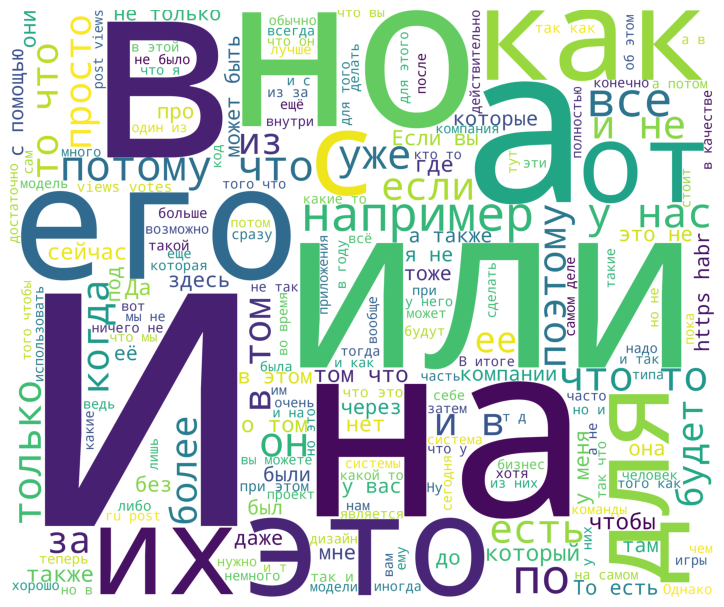

In [300]:
corpus = get_corpus(df['textpub'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

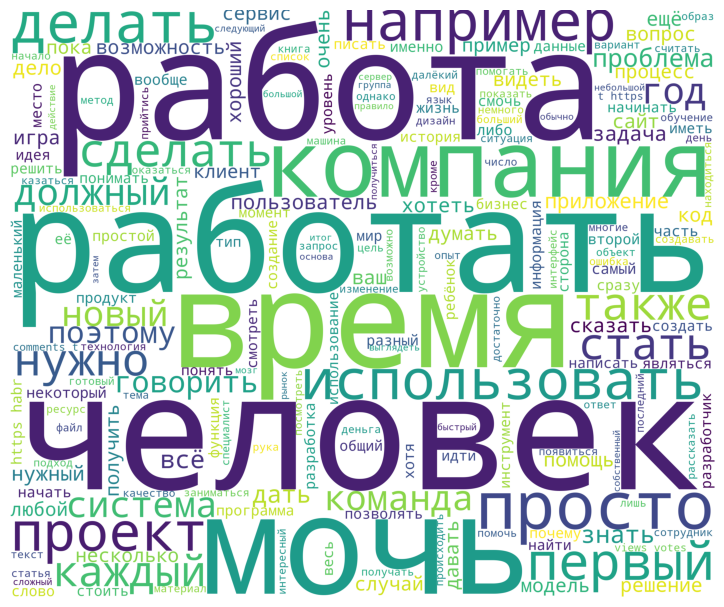

In [302]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [303]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

<Axes: >

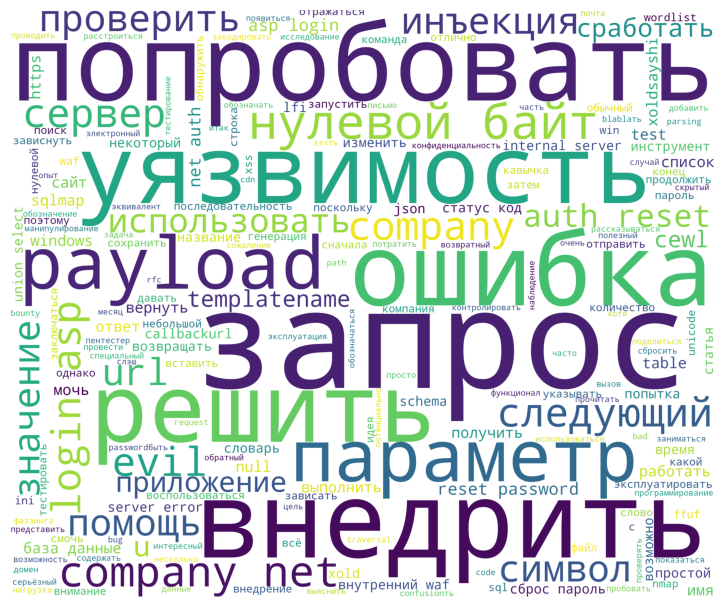

In [304]:
corpus = df['text_lemm'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

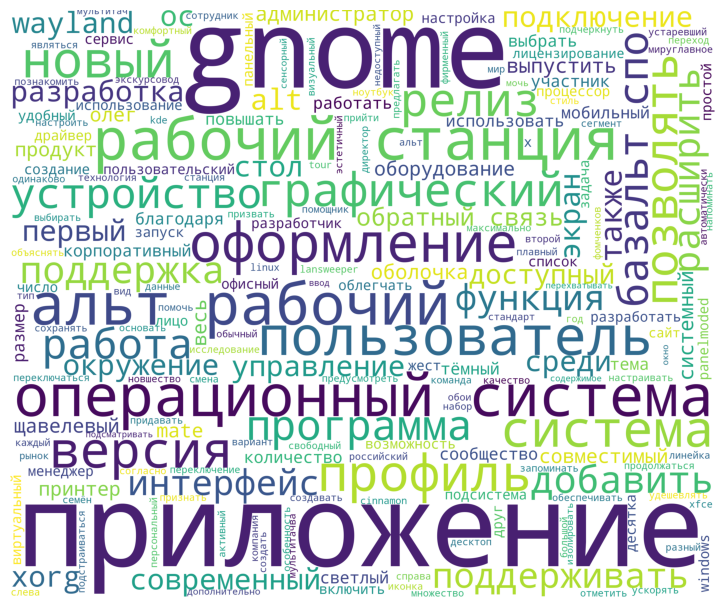

In [305]:
corpus = df['text_lemm'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [306]:
df['text_lemm'][1]

'базальт спо выпустить операционный система альт рабочий станция новый графический оболочка gnome также добавить новый приложение системный администратор пользователь поддержка современный оборудование расширить линейка совместимый принтер gnome выбирать весь мируглавное новшество релиз графический оболочка gnome прийти смена устаревший mate директор продукт базальт спо олег щавелевый отметить рабочий окружение gnome являться признать корпоративный стандарт весь мир согласно исследование компания lansweeper год операционный система gnome использовать пользователь linux корпоративный сегмент первый российский рынок выбрать gnome версия позволять создавать приложение одинаково работать ноутбук десктоп мобильный устройство система подстраиваться размер экран тип устройство автоматически настраивать светлый тёмный тема удешевлять ускорять разработка также повышать качество приложение добавить олег щавелевый благодаря большой количество участник сообщество gnome создать множество свободный 

<Axes: >

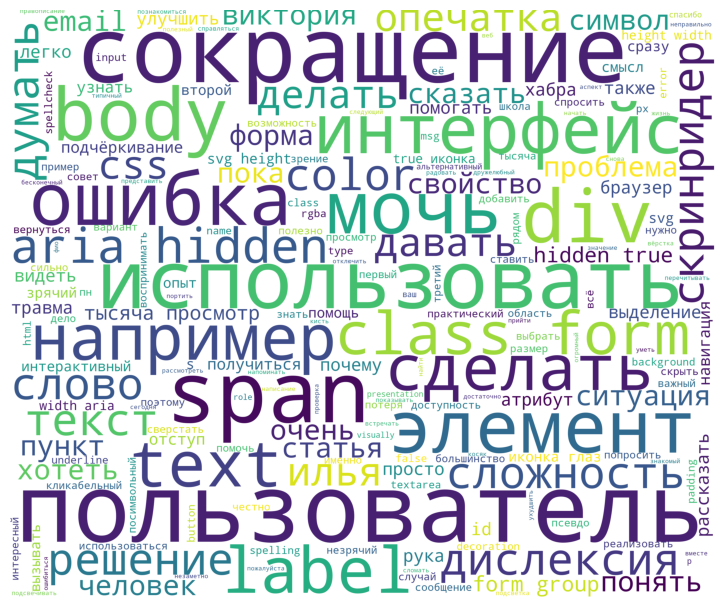

In [307]:
corpus = df['text_lemm'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [308]:
df['text_lemm'][2]

'хабра снова прийти практический совет доступность вместе илья показывать html css мочь улучшить ухудшить её напоминать илья незрячий знакомый помогать найти косяк вёрстка сегодня рассмотреть следующий аспект сделать пользователь дислексия незаметно улучшить интерфейс пользователь травма кисть рука сложность сокращение пользователь скринридер давать начать ▍ делать веб интерфейс дружелюбный пользователь дислексия опечатка огромный проблема большинство видеть перечитывать текст знать почему радовать браузер уметь подсвечивать слово написание ошибиться очень легко сломать достаточно неправильно использовать атрибут spellcheck использовать значение false браузер отключить проверка правописание body form class form spellcheck false элемент форма form body делать пожалуйста подсветка ошибка очень сильно помогать думать также полезный человек дислексия познакомиться виктория дислексия попросить рассказать сложность встречать интерфейс типичный ошибка очень сильно портить жизнь бесконечный оп

# Векторизация текстовых данных

In [316]:
from sklearn.feature_extraction.text import CountVectorizer

In [318]:
df['text_lemm'][0]

'статья пентестер xold месяц заниматься поиск уязвимость bug bounty решить поделиться опыт наблюдение статья рассказываться несколько уязвимость обнаружить помощь инъекция нулевой байт цель конфиденциальность проверять сайт обозначаться статья company com нулевой байт нулевой байт часто обозначать специальный символ нулевой значение программирование использоваться обозначение конец строка данные инъекция нулевой байт заключаться манипулирование символ эксплуатация уязвимость уязвимость сброс пароль parsing confusionть тестировать cdn приложение решить проверить функционал сброс пароль время тестирование обнаружить очень интересный параметр название callbackurl попытка сбросить пароль добавить test конец url проверить электронный почта письмо получить следующий url https company com auth reset‑password test code blablaть попробовать изменить имя домен параметр callbackurl evil com сожаление получить статус‑код bad request расстроиться решить потратить некоторый время задача поскольку во

In [320]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

CountVectorizer()

In [322]:
print(vectorizer.vocabulary_)

{'статья': 68870, 'пентестер': 54389, 'xold': 23209, 'месяц': 45655, 'заниматься': 36924, 'поиск': 57023, 'уязвимость': 73416, 'bug': 2632, 'bounty': 2385, 'решить': 64143, 'поделиться': 56332, 'опыт': 52360, 'наблюдение': 47367, 'рассказываться': 63049, 'несколько': 49848, 'обнаружить': 50994, 'помощь': 57685, 'инъекция': 39255, 'нулевой': 50633, 'байт': 25663, 'цель': 75430, 'конфиденциальность': 42050, 'проверять': 60225, 'сайт': 64948, 'обозначаться': 51047, 'company': 3811, 'com': 3738, 'часто': 75743, 'обозначать': 51046, 'специальный': 68308, 'символ': 66339, 'значение': 37973, 'программирование': 60323, 'использоваться': 39457, 'обозначение': 51048, 'конец': 41782, 'строка': 69343, 'данные': 32970, 'заключаться': 36547, 'манипулирование': 44854, 'эксплуатация': 77332, 'сброс': 65399, 'пароль': 54112, 'parsing': 15141, 'confusionть': 3972, 'тестировать': 70692, 'cdn': 3047, 'приложение': 59665, 'проверить': 60215, 'функционал': 74466, 'время': 30018, 'тестирование': 70681, 'очен

In [324]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [325]:
count_matrix.shape

(1222, 274842)

In [326]:
vectorizer.get_feature_names_out()[45000:46000]

array(['встреча становиться', 'встреча старый', 'встреча старый друг',
       'встреча стать', 'встреча стать просто', 'встреча формат',
       'встреча хранить', 'встреча хранить важный', 'встреча человек',
       'встреча эйчар', 'встреча эксперт', 'встреча эксперт поговорить',
       'встречать', 'встречать дурачок', 'встречать дурачок говорить',
       'встречать настоящий', 'встречать настоящий жизнь',
       'встречать непонимание', 'встречать непонимание суть',
       'встречать новый', 'встречать первый', 'встречать смерть',
       'встречать смерть мужчина', 'встречать улица',
       'встречать улица заметить', 'встречать улыбка',
       'встречать улыбка мочь', 'встречать человек', 'встречаться',
       'встречаться бесплатный', 'встречаться вариант',
       'встречаться весь', 'встречаться вживую', 'встречаться вопрос',
       'встречаться выяснять', 'встречаться выяснять залезть',
       'встречаться говорить', 'встречаться говорить тихо',
       'встречаться достаточно', '

In [327]:
vectorizer.get_feature_names_out()[3087]

'com отличный'

In [328]:
vectorizer.get_feature_names_out()[25765]

'безопасность открыто'

In [329]:
print(count_matrix)

  (0, 237709)	3
  (0, 156392)	1
  (0, 115657)	1
  (0, 76513)	1
  (0, 166466)	2
  (0, 258149)	8
  (0, 2240)	1
  (0, 2133)	1
  (0, 210477)	8
  (0, 163277)	1
  (0, 146450)	1
  (0, 123104)	1
  (0, 205634)	1
  (0, 133521)	1
  (0, 139391)	2
  (0, 171845)	6
  (0, 89170)	6
  (0, 138240)	10
  (0, 24919)	8
  (0, 264433)	1
  (0, 102602)	1
  (0, 187939)	1
  (0, 213954)	4
  (0, 139606)	1
  (0, 3153)	15
  :	:
  (1221, 255744)	1
  (1221, 103233)	1
  (1221, 27862)	1
  (1221, 114034)	1
  (1221, 208691)	1
  (1221, 128133)	1
  (1221, 190638)	1
  (1221, 140331)	1
  (1221, 188683)	1
  (1221, 127988)	1
  (1221, 274396)	1
  (1221, 246809)	1
  (1221, 163140)	1
  (1221, 236845)	1
  (1221, 193772)	1
  (1221, 57672)	1
  (1221, 238061)	1
  (1221, 124878)	1
  (1221, 167842)	1
  (1221, 15451)	1
  (1221, 241431)	1
  (1221, 177097)	1
  (1221, 91433)	1
  (1221, 197590)	1
  (1221, 3916)	1


### TF-IDF

In [337]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [339]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [341]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

CPU times: total: 15.1 s
Wall time: 15.2 s


In [342]:
tfidf_matrix.shape

(1222, 10000)

In [343]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['about', 'academy', 'access', 'accessibility', 'action', 'active',
       'add', 'address', 'admin', 'adobe', 'advanced', 'after', 'agency',
       'agent', 'agile', 'ai', 'aic', 'air', 'airbnb', 'al', 'all',
       'alpha', 'amazon', 'an', 'analysis', 'analytics', 'and', 'and the',
       'android', 'android ios', 'android разработка',
       'android разработчик', 'angular', 'any', 'apache', 'api', 'app',
       'app store', 'append', 'apple', 'application', 'apps', 'ar',
       'architecture', 'arduino', 'are', 'args', 'arm', 'array', 'art',
       'as', 'async', 'at', 'audio', 'auto', 'avito', 'await', 'awesome',
       'aws', 'azure', 'back', 'backend', 'background', 'bad', 'badoo',
       'balance', 'bar', 'base', 'based', 'bash', 'basic', 'be', 'before',
       'best', 'beta', 'beyond', 'big', 'big data', 'bin', 'black',
       'block', 'blog', 'blue', 'bluetooth', 'board', 'body', 'bold',
       'book', 'boolean', 'boot', 'bootstrap', 'box', 'brain', 'brand',
       'bre

In [344]:
tfidf_vectorizer.get_feature_names_out()[1253]

'бета'

In [345]:
tfidf_vectorizer.get_feature_names_out()[5866]

'первый статья'

In [346]:
print(tfidf_matrix)

  (0, 844)	0.025662432549362166
  (0, 3677)	0.025146134417542043
  (0, 378)	0.029259051679409242
  (0, 6452)	0.028136149200956105
  (0, 6967)	0.03034089042762804
  (0, 4789)	0.02856016420775435
  (0, 1184)	0.07230710871027257
  (0, 2340)	0.0268531493126482
  (0, 7745)	0.05803365361817158
  (0, 6625)	0.02455816018146389
  (0, 3178)	0.06491457462530666
  (0, 3470)	0.027934988060866993
  (0, 4484)	0.02154951528749496
  (0, 6853)	0.026081454972494155
  (0, 5378)	0.02154951528749496
  (0, 6809)	0.029775349811229364
  (0, 4497)	0.025023786055401953
  (0, 4852)	0.04499601436091506
  (0, 900)	0.032047905322734195
  (0, 9910)	0.025023786055401953
  (0, 5721)	0.025398669777579246
  (0, 6163)	0.024447246945887145
  (0, 3569)	0.014724090207551967
  (0, 843)	0.0210953505541597
  (0, 9794)	0.013306847602578269
  :	:
  (1221, 1738)	0.0074024437747611735
  (1221, 2913)	0.16920794698065517
  (1221, 8349)	0.013700645491770035
  (1221, 6465)	0.02244963929272884
  (1221, 6371)	0.014673691815905209
  (1221